# Geolocation project

## Get and Visualize synthetic location data

#### Distributed Data and Data Engineering Spring 2020

#### By: Sam Watson

Upload the synthetic clustering data fromhttp://statistical-research.com/wp-content/uploads/2013/11/sample_geo.txt  to S3and visualize the (latitude, longitude) pairs. You do not have to use SPARK for the visualization.

In [2]:
#importing pyspark
from pyspark import SparkContext

In [3]:
#getting SparkContext
sc=SparkContext.getOrCreate()

In [4]:
filepath="s3a://geocluster/dataset2"

In [5]:
#retrieving the dataset
lines=sc.textFile(str(filepath)+"/sample_geo.txt")

In [6]:
lines.take(10)

[u'Latitude\tLongitude\tLocationID',
 u'',
 u'37.77253945\t-77.49954987\t1',
 u'',
 u'42.09013298\t-87.68915558\t2',
 u'',
 u'39.56341754\t-75.58753204\t3',
 u'',
 u'39.45302347\t-87.69374084\t4',
 u'']

#### The data is separated by \t. I'm going to split the data by this value, and graph the first two columns

In [7]:
data=lines.map(lambda element: element.split("\t"))
data.take(10)

[[u'Latitude', u'Longitude', u'LocationID'],
 [u''],
 [u'37.77253945', u'-77.49954987', u'1'],
 [u''],
 [u'42.09013298', u'-87.68915558', u'2'],
 [u''],
 [u'39.56341754', u'-75.58753204', u'3'],
 [u''],
 [u'39.45302347', u'-87.69374084', u'4'],
 [u'']]

#### It appears rows are also separated by tab! these will be dropped as well.

In [8]:
data=data.filter(lambda x: x[0]!='')
data.take(10)

[[u'Latitude', u'Longitude', u'LocationID'],
 [u'37.77253945', u'-77.49954987', u'1'],
 [u'42.09013298', u'-87.68915558', u'2'],
 [u'39.56341754', u'-75.58753204', u'3'],
 [u'39.45302347', u'-87.69374084', u'4'],
 [u'38.9537989', u'-77.01656342', u'5'],
 [u'39.90031211', u'-75.74486542', u'6'],
 [u'36.24009843', u'-115.1586914', u'7'],
 [u'26.11330818', u'-80.09202576', u'8'],
 [u'34.27036086', u'-118.3162918', u'9']]

#### Uploading data to s3!

In [10]:
data.saveAsTextFile("s3a://geocluster/dataset2/dataset2clean.csv")

#### Now, I'm getting the latitudes and longitudes in a list to then be graphed

In [11]:
lats=data.map(lambda x: x[0]).collect()
longs=data.map(lambda x: x[1]).collect()

In [12]:
def floatconvert(l):
    l2=[]
    for i in range(len(l)):
        if i ==0: #excluding the header
            pass
        else:
            l2.append(float(l[i]))
    return l2

In [13]:
lats=floatconvert(lats)
longs=floatconvert(longs)

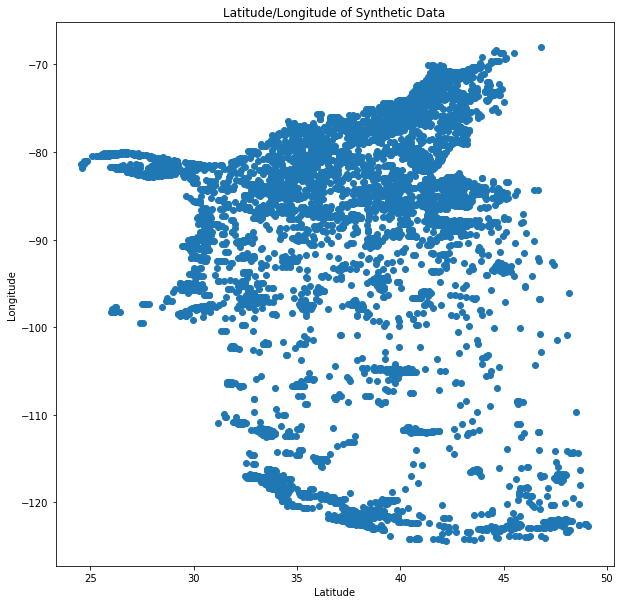

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(lats,longs)
plt.title("Latitude/Longitude of Synthetic Data")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

Neat!